In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("spotify-2023.csv", encoding="latin1")
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df = df.replace("-", np.nan)

In [10]:
df = df.apply(lambda col: col.fillna(col.mean()) if np.issubdtype(col.dtype, np.number) else col)

In [14]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

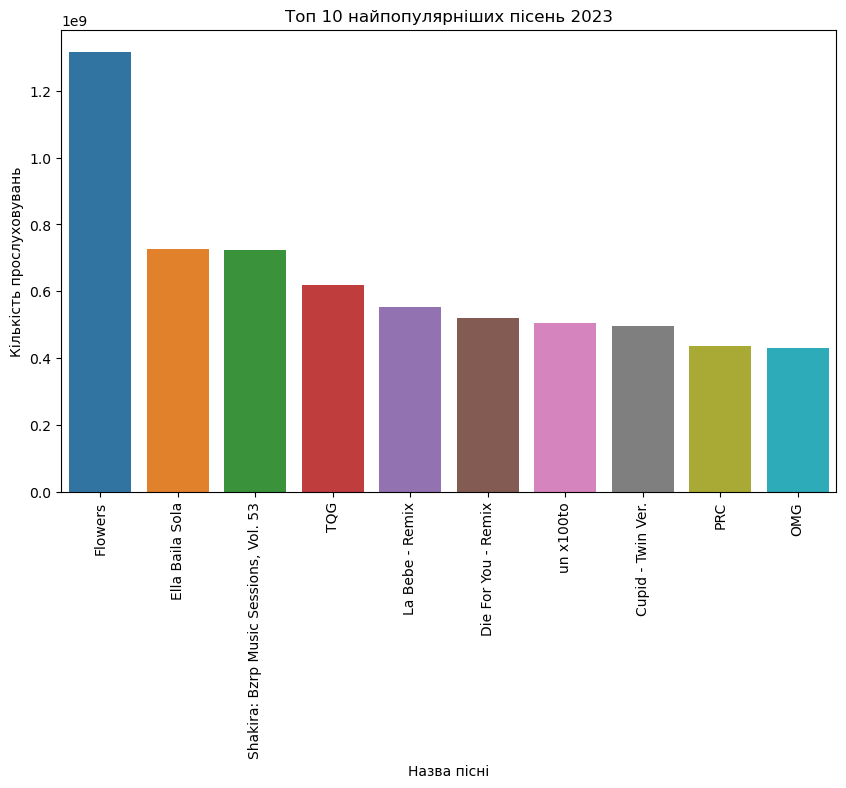

In [59]:
#1. Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10
#найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df2023 = df[df['released_year'] == 2023]
df2023 = df2023.sort_values('streams', ascending=False)
df2023 = df2023.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='track_name', y='streams', data=df2023)
plt.title("Топ 10 найпопулярніших пісень 2023")
plt.xlabel('Назва пісні')
plt.xticks(rotation=90)
plt.ylabel('Кількість прослуховувань')
plt.show()

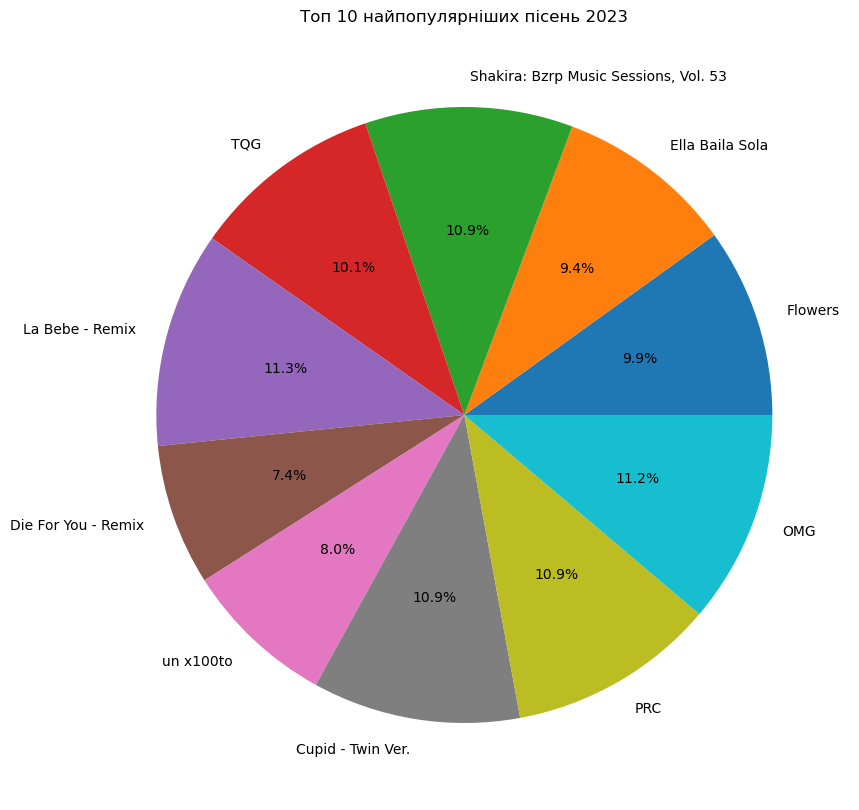

In [43]:
#2. Створіть кругову діаграму або секторну діаграму, яка відображає розподіл
#за danceability серед найпопулярніших пісень у 2023 році.
df2023 = df[df['released_year'] == 2023]
df2023 = df2023.sort_values('streams', ascending=False)
df2023 = df2023.head(10)

plt.figure(figsize=(10, 10))
plt.pie(df2023['danceability_%'], labels=df2023['track_name'], autopct='%1.1f%%')
plt.title("Топ 10 найпопулярніших пісень 2023")
plt.axis=('equal')
plt.show()

C:\Users\count\AppData\Local\Temp\ipykernel_8320\4257698169.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


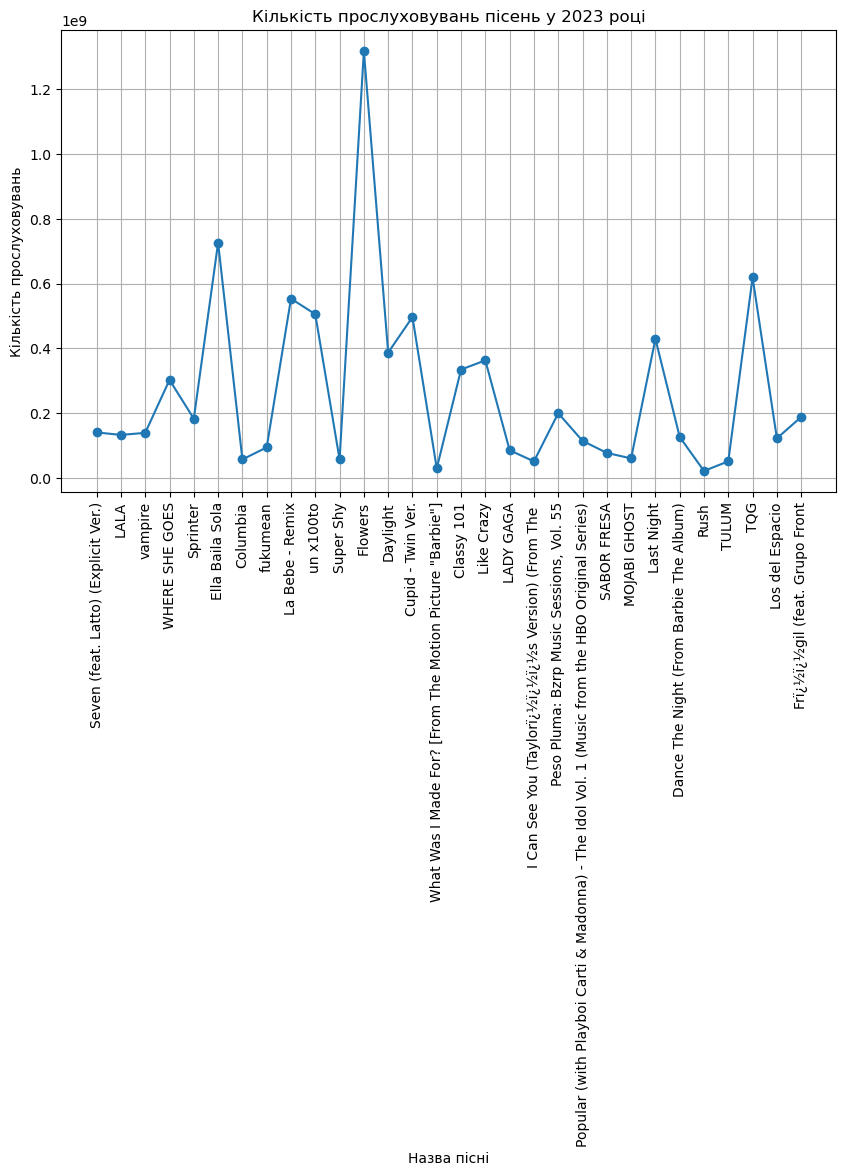

In [53]:
#3. Побудуйте лінійний графік, який відображає зміни кількості прослуховувань
#певного треку протягом року 2023 року
df2023 = df[df['released_year'] == 2023]
df2023 = df2023.head(30)
plt.figure(figsize=(10, 6))
plt.plot(df2023['track_name'], df2023['streams'], marker='o', linestyle='-')
plt.title('Кількість прослуховувань пісень у 2023 році')
plt.xlabel('Назва пісні')
plt.ylabel('Кількість прослуховувань')
plt.xticks(rotation=90)  # Повернути підписи осі x для зручності
plt.grid(True) 
plt.tight_layout()
plt.show()

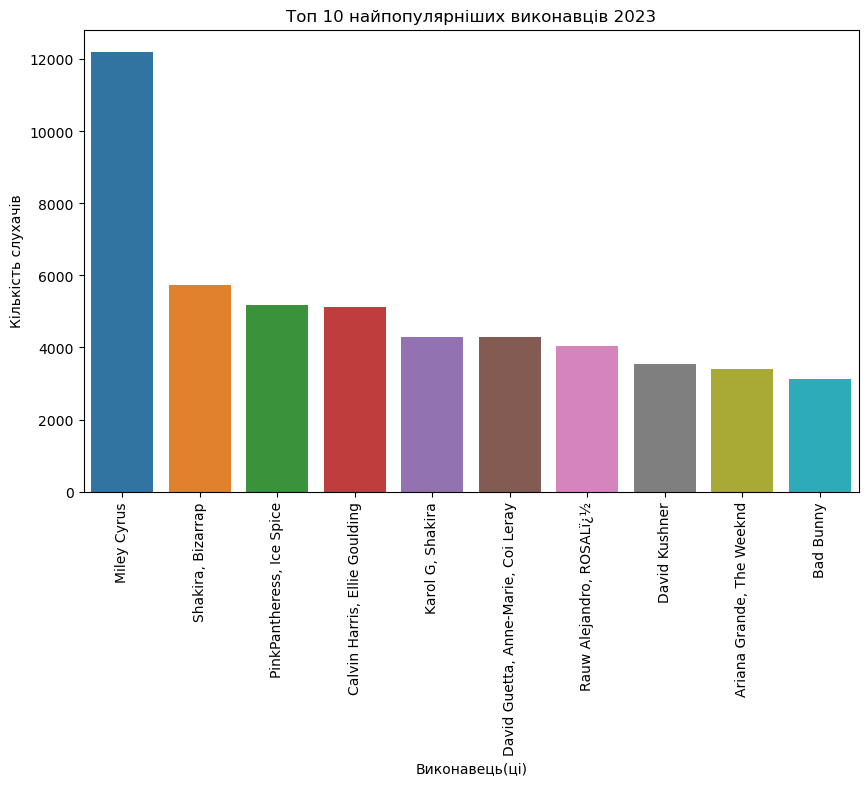

In [57]:
#4. Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших
#артистів на Spotify у 2023 році за кількістю слухачів. artist(s)_name in_spotify_playlists
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df2023 = df[df['released_year'] == 2023]
df2023 = df2023.sort_values('in_spotify_playlists', ascending=False)
df2023 = df2023.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='artist(s)_name', y='in_spotify_playlists', data=df2023)
plt.title("Топ 10 найпопулярніших виконавців 2023")
plt.xlabel('Виконавець(ці)')
plt.xticks(rotation=90)
plt.ylabel('Кількість слухачів')
plt.show()

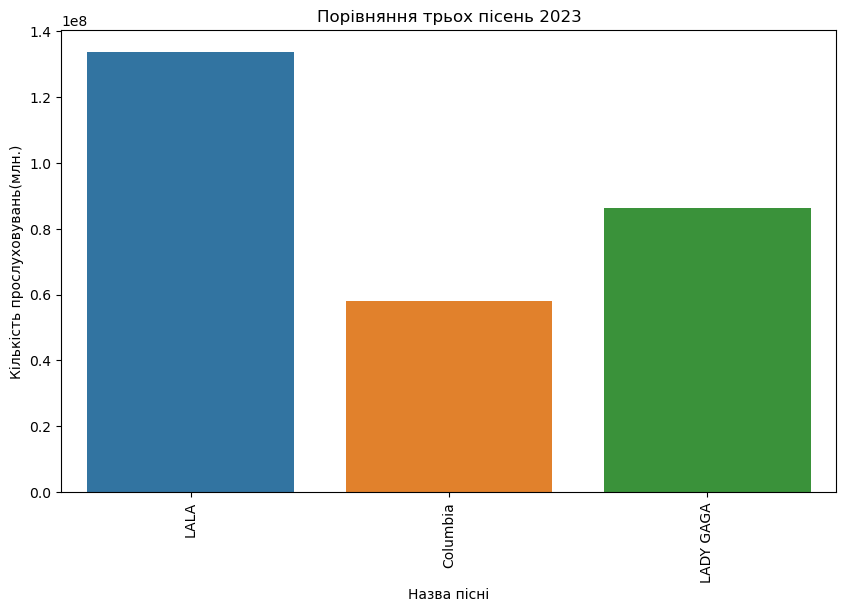

In [61]:
#5. Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість
#прослуховувань трьох конкретних треків у 2023 році.
df2023 = df[df['released_year'] == 2023]
df2023songs = df2023.iloc[[1, 6, 17]]

plt.figure(figsize=(10, 6))
sns.barplot(x='track_name', y='streams', data=df2023songs)
plt.title("Порівняння трьох пісень 2023")
plt.xlabel('Назва пісні')
plt.xticks(rotation=90)
plt.ylabel('Кількість прослуховувань(млн.)')
plt.show()